In [1]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

## Tratamento dos Dados

### Importação e visualização dos Dados

In [2]:
df = pd.read_csv("dados_cryotherapy.csv", encoding="utf-8")
df.head()

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0


In [3]:
df.shape

(90, 7)

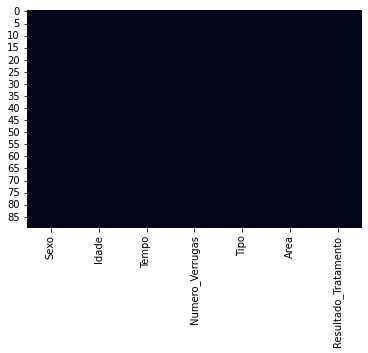

In [4]:
#Verificando a existência de dados nulos por mapa de calor
sns.heatmap(df.isnull(), cbar=False);

In [5]:
#Verificando o tipo dos dados
df.dtypes

Sexo                    int64
Idade                   int64
Tempo                   int64
Numero_Verrugas         int64
Tipo                    int64
Area                    int64
Resultado_Tratamento    int64
dtype: object

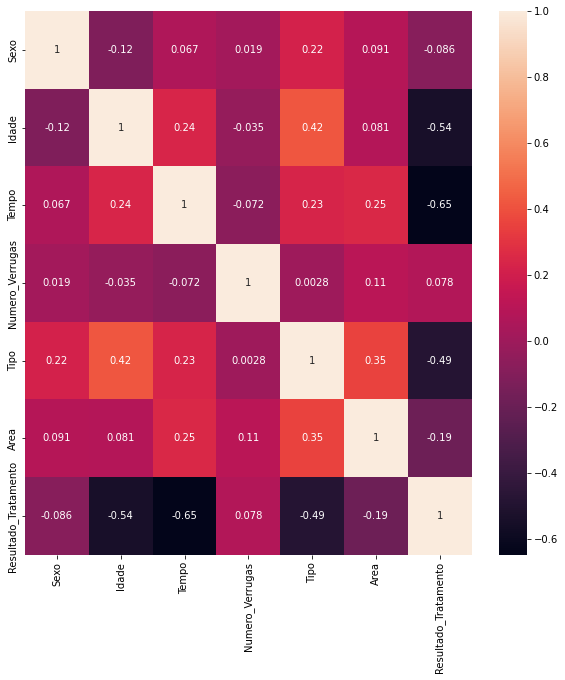

In [6]:
#Matriz de Correlação
correlations = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlations, annot=True); #Annot serve para exibir o valor no gráfico

### Definição dos conjuntos de Treinamento e Validação

In [9]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df[['Sexo','Idade','Tempo','Numero_Verrugas','Tipo','Area']])

#Definição do atributo de classificacao
data_classif = np.array(df['Resultado_Tratamento'])

In [10]:
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.25)

In [11]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  1  20   3  11   1  75]
 [  1  41   8   2   2  20]
 [  2  28   5   9   1 100]
 [  2  41   7   5   2  20]
 [  1  29   7   5   1  96]
 [  2  19   8   6   1 160]
 [  2  40   8   6   2  80]
 [  2  23  11  12   3  72]
 [  1  20   5   3   1   6]
 [  2  36  10   4   1   8]
 [  1  15  10  11   1  30]
 [  1  63   2   3   3  20]
 [  2  17  11   2   1  10]
 [  2  50   9   4   3 132]
 [  1  15   2  11   1   4]
 [  1  35   9   9   1 100]
 [  1  15   4   7   1   6]
 [  2  16   8   1   2  60]
 [  2  30   1   8   3 115]
 [  1  22   5   2   1  70]
 [  2  32  12   4   3 750]
 [  2  21  10   5   1  35]
 [  2  35   8   8   3 100]
 [  1  27  10   7   1   6]
 [  1  20   4   3   1   6]
 [  1  34  12   1   3 150]
 [  2  21  10   7   1  35]
 [  1  17  11   2   1  10]
 [  2  35  12   5   3 100]
 [  1  23  10   7   3  72]
 [  1  35  12   5   1 100]
 [  2  17   3   3   1  63]
 [  1  15   5   5   1   6]
 [  2  28   4  11   1 100]
 [  2  23   9   5   3  72]
 [  1  

In [12]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df.index)) * 100))

74.44% nos dados de treino
25.56% nos dados de teste


## Naive Bayes - GaussianNB

In [13]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento

modelo_NB = GaussianNB()   #Método construtor da classe
modelo_NB.fit(x_treino, y_treino)  

GaussianNB()

### Predição e Acurácia para o conjunto de treinamento

In [18]:
print("# Predicao para o conjunto de treinamento #")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento: ")
print(accuracy_score(y_treino, y_pred_treino), "na Base de Treinamento")

# Predicao para o conjunto de treinamento #
Acuracia para o conjunto de treinamento: 
0.835820895522388 na Base de Treinamento


### Predição e Acurácia para o conjunto de validação

In [19]:
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val), "na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.9130434782608695 na Base de Teste


### Métricas

In [20]:
from sklearn import metrics

In [21]:
# Criando uma Matriz de Confusão
print("Matriz de Confusão")
print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

# Criando um Relatório de Classificação
print("Relatório de Métricas")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Matriz de Confusão
[[11  1]
 [ 1 10]]

Relatório de Métricas
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           0       0.91      0.91      0.91        11

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



## Randon Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

### Verificação dos Dados de Treinamento

In [24]:
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


### Verificação dos Dados de Teste

In [25]:
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))

Exatidão (Accuracy): na Base de Teste 1.0000



### Validação do Modelo com Matriz de Confusão 

In [26]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[12  0]
 [ 0 11]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           0       1.00      1.00      1.00        11

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



## Regressão Logística

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [30]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Relatório de Métricas")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.9130

Relatório de Métricas
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           0       0.85      1.00      0.92        11

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23



## Comparativo

### Exatidão quanto a cada modelo: 

Naive Bayes -> 0.83 , 0.91

Randon Forest -> 1.0, 1.0

Regressão Logística -> 0.91 no Teste

Com isso, NB e RL apresentaram uma exatidão semelhante, então seria indiferente o uso qualquer das duas!

## Persistência do modelo no arquivo Crioterapia
Modelo no Naive Bayes escolhido

In [31]:
import joblib

In [32]:
joblib.dump(modelo_NB, 'modelo_crioterapia_MNB.pkl')

['modelo_crioterapia_MNB.pkl']